# Modern AI Pro: Machine Learning approch to predict a class of a person based on characteristics like education and gender.

This is part of a ML course from *Invento Robotics*.
In this lecture, we will dive deep into why we need ML. We will use a house prediction model for this. The dataset is here: http://www.openml.org/d/1590

1. We will first use a hand crafted rules engine with 2 parameters (homework would be to tune this up with more parameters) in traditional programming with no ML)
2. As a second step we will use Scikit learn with one classifier type.
3. Finally we will do PyTorch to build a simple NN

In each case, we will measure the accuracy of our method.

Tools we will use for this:


1. Pandas
2. Scikit-learn
3. Seaborn












## Step 1: Load the Data

In [ ]:
from google.colab import userdata
from os import environ

environ["KAGGLE_KEY"]      = userdata.get('KAGGLE_KEY')
environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

! pip -q install kaggle
! kaggle datasets download -d uciml/adult-census-income
! unzip /content/adult-census-income.zip

Dataset URL: https://www.kaggle.com/datasets/uciml/adult-census-income
License(s): CC0-1.0
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 24.3MB/s]
Archive:  /content/adult-census-income.zip
  inflating: adult.csv               


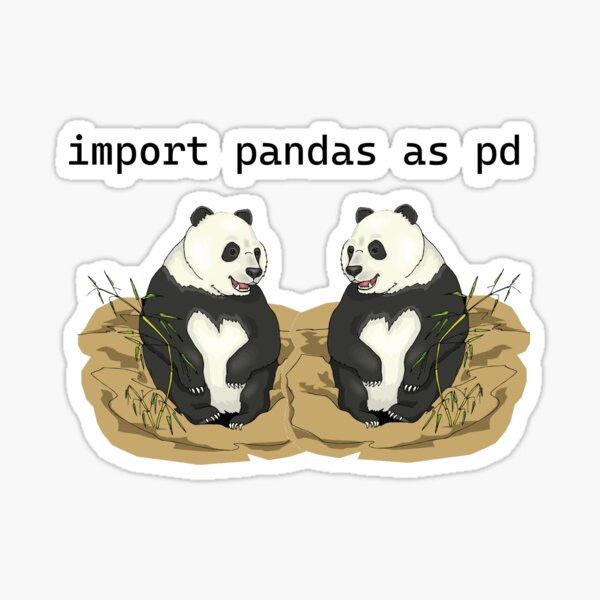

In [ ]:
import pandas as pd
df = pd.read_csv('adult.csv')
df.head()
#Once you run this code, you should be able to see top 5 rows of the downloaded dataset.


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Step 2: Data visualization

Let's plot the numerical data into histograms that will help you identify how the data looks like**

What does the data show? Are you able to draw some inferences from this?

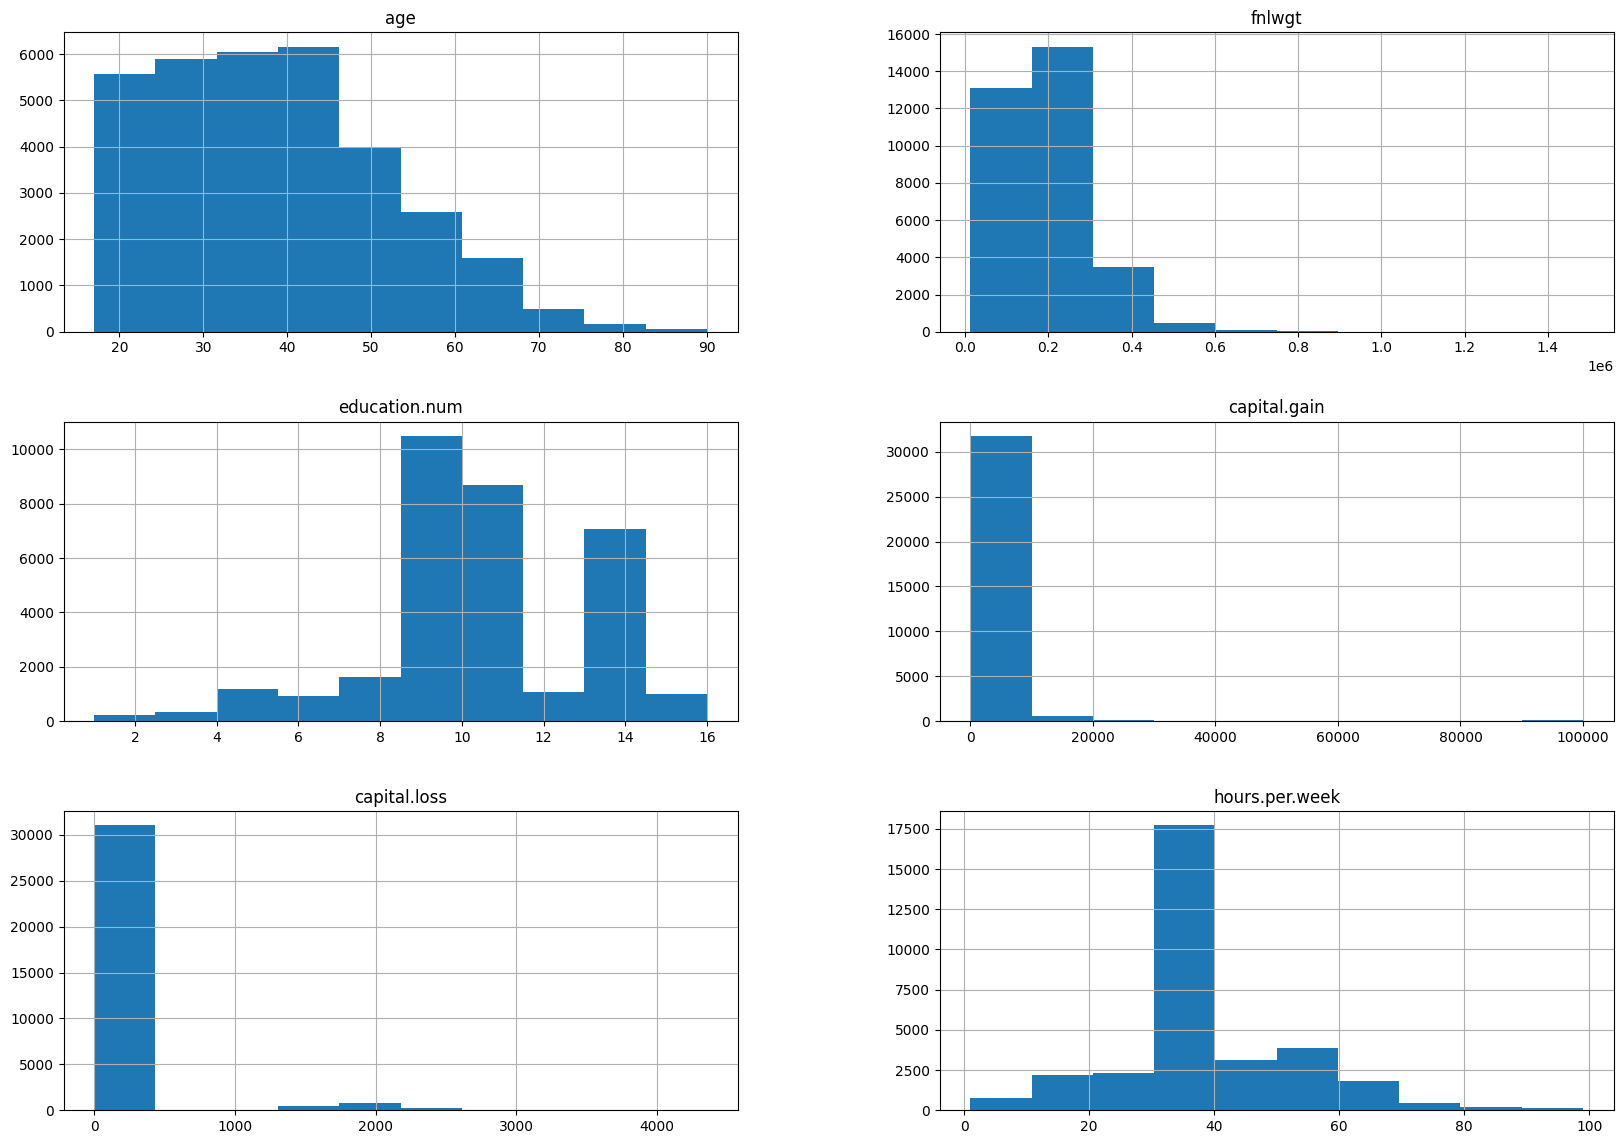

In [ ]:
_ = df.hist(figsize = (20,14))
#By convention, the underscore (_) is a garbage variable that we don't care about using that later.
#Here, we used this to avoid printing additional info from running this method.
#As an exercise try removing the _= and run the above.

**We will now look at some of the non-numeric data columns.**
When we run the info on the dataframe if we see int or float datatypes it is numeric, and anything else is non-numeric. We might be able to convert those to numeric representation too.

In [ ]:
df.info()

**We will print each non-numeric column and see what kind of data exists**
We will use a method called value_counts() to print the different labels of data stored in a column and how many of each exist.

In [ ]:
df["workclass"].value_counts()

In [ ]:
df["education"].value_counts()

In [ ]:
df["marital.status"].value_counts()

In [ ]:
df["native.country"].value_counts()

In [ ]:
df["occupation"].value_counts()

In [ ]:
df["race"].value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [ ]:
df["sex"].value_counts()

In [ ]:
df["income"].value_counts()

In [ ]:
df["relationship"].value_counts()

## Step 3: Let's code up a basic rule to predict the class in the traditional programming way
For the class exercise, we will take up only 2-3 parameters. As an exercise, the student is expected to use more parameters and find out how close they get to the result.

In [ ]:
#Let's start with a very basic implementation that will bring up a bunch of social biases.
def naive_class_predictor(row):
  if((row["education"]=="Bachelors" or row["education"] == "Masters") and row["race"] == "White" and row["sex"] == "Male" and row["age"] > 30):
    return ">50K"
  else:
    return "<=50K"

naive_class_predictor(df.loc[1000]) #Just sanity testing with a random row

'>50K'

In [ ]:
#We will now iterate through every row of the dataset we have
correct = 0
for index, row in df.iterrows():
  predicted_output = naive_class_predictor(row)
  if(predicted_output == row["income"]):
    correct += 1

num_rows = df.shape[0]
print("We got ",correct," correct entries out of a total of ",num_rows, ". The accuracy is: ",str(round(100*correct/num_rows)),"%")


We got  25669  correct entries out of a total of  32561 . The accuracy is:  79 %


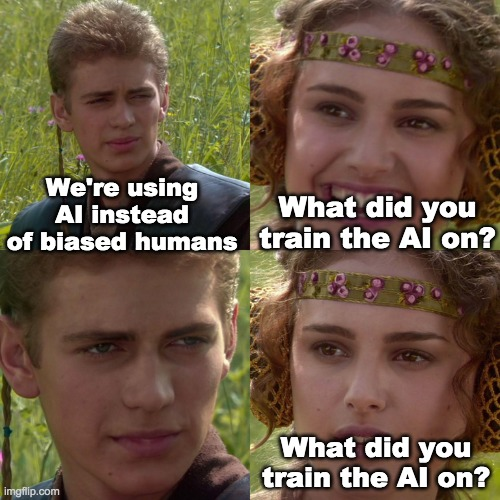

## Step 4: Cleaning up the data for ML
Are you surprised on how much accuracy you could get by a very naive implementation using social biases? For this dataset, you might be able to get accuracy closer to 90% by adding a lot more qualifying rules using your understanding of the data. Before we do that we need to make some modifications on the data to make it easy for the machine to understand it.

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
old_df = df
for col in df.columns:
  if df[col].dtype.kind in 'fi':
    if df[col].isnull().any():
      df[col].fillna(df[col].median(), inplace = True)

  else:
    df[col] = encoder.fit_transform(df[col])

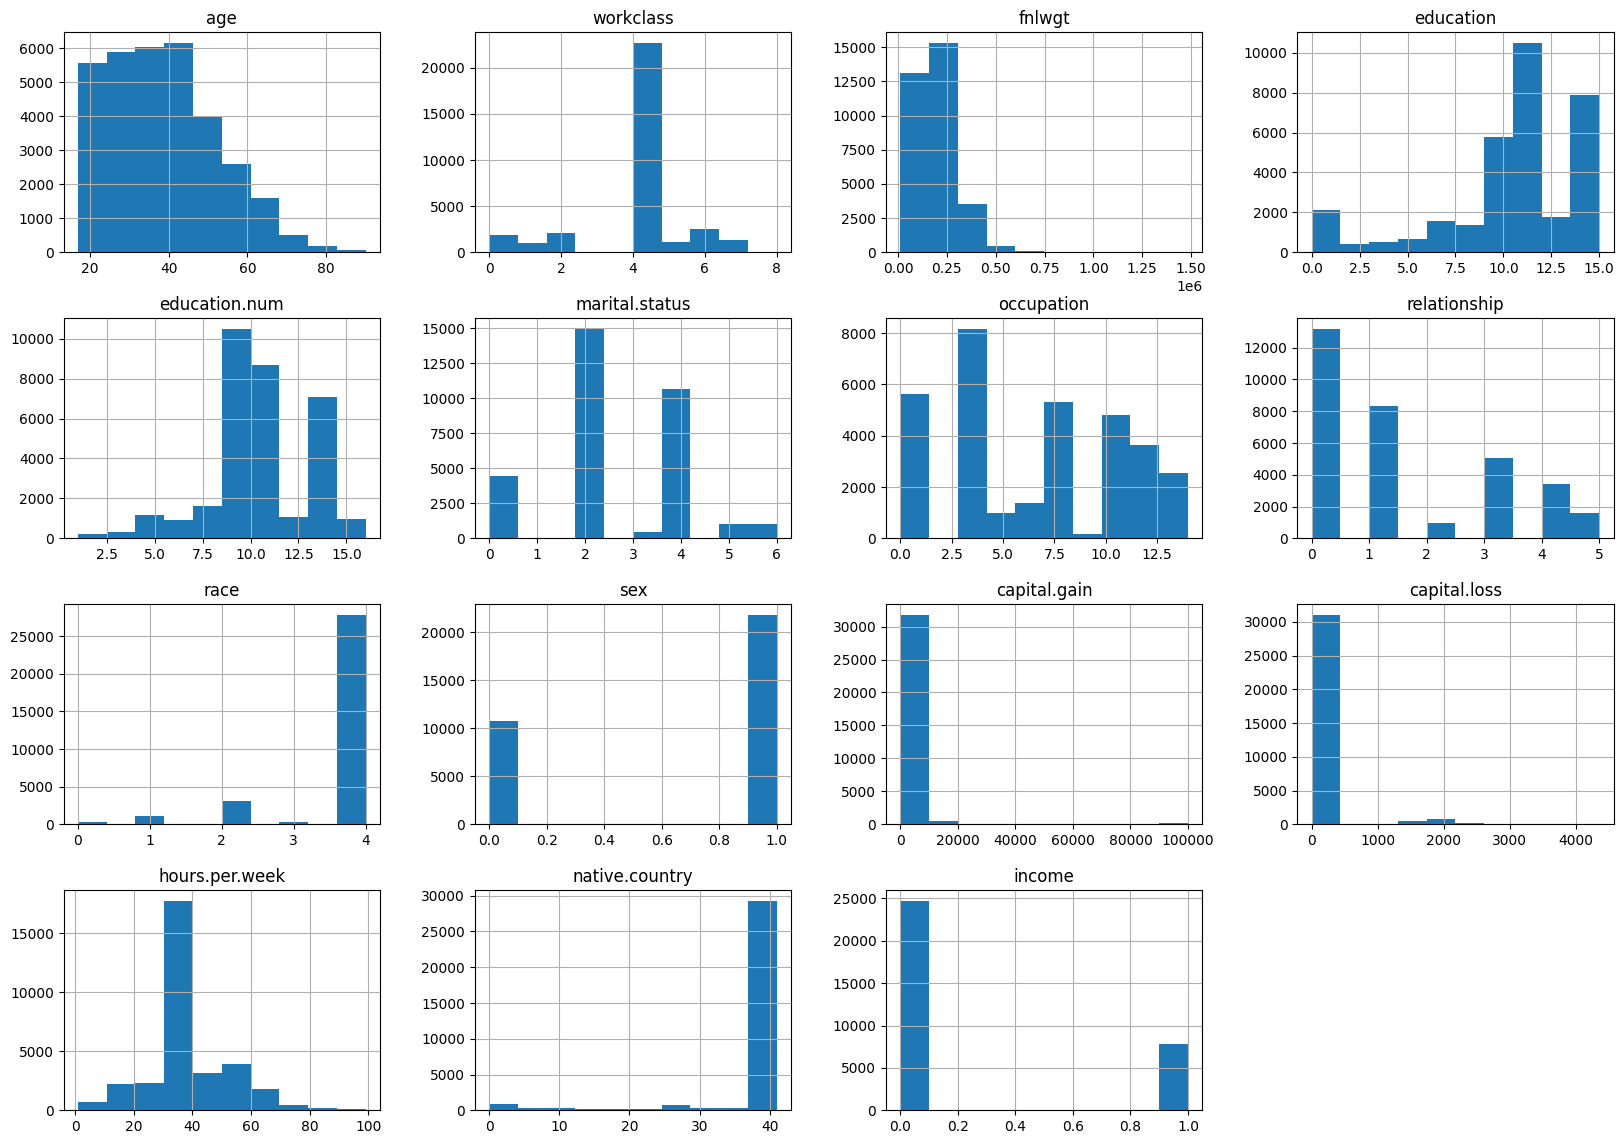

In [ ]:
_ = df.hist(figsize = (20,14))

**Let's see if there are correlations in the data with a heatmap**

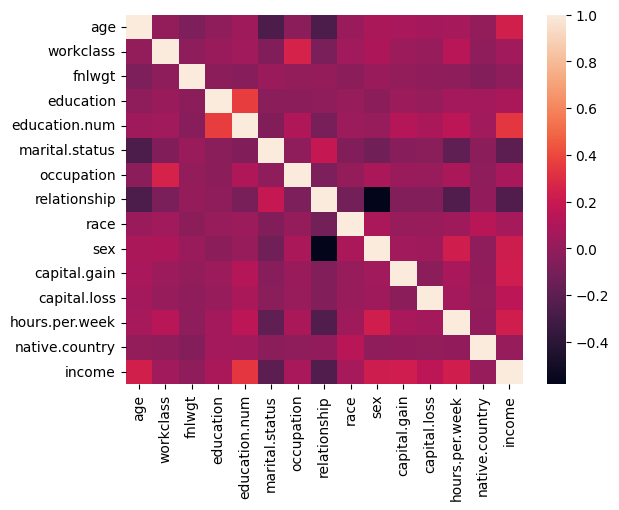

In [ ]:
import seaborn as sns
_ = sns.heatmap(df.corr())

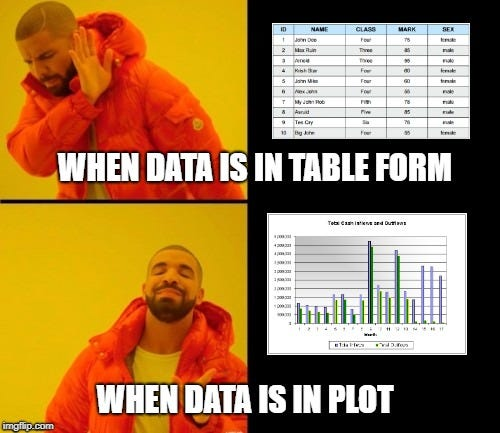

## Step 5: Setup Machine Learning

**We will split the data for testing and training**
How do you know the machine works for data it has not seen it. In real world, it is going to encounter data that it has not been trained for. Will it work? That is why we need to build a test data set that the machine has not seen already.




In [ ]:
y = df["income"]
X = df.drop("income", axis="columns")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


**First let's fit a basic model with a classifier called KNeighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=50)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=50)

**How well did we do? We need to check the scores**

In [ ]:
accuracy = model.score(X_test, y_test)
print(accuracy)

model_name = model.__class__.__name__
print(f"The test accuracy using a {model_name} is "f"{accuracy:.3f}")

0.7976354982343006
The test accuracy using a KNeighborsClassifier is 0.798


In [ ]:
prediction = model.predict(X_test.iloc[[19]]) #Taking the 1st element in test and checking what the income prediction is for that.
if prediction != [0]:
  print("Admitted into the club") #Income >50K

else:
  print("Bummer! Go away!")

Bummer! Go away!


## Step 6: Let's test more classifiers
**6a: Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
trainer=DecisionTreeClassifier(criterion='entropy')

model = trainer.fit(X_train,y_train)
accuracy = model.score(X_test, y_test)
print(accuracy)

#Syntactic sugar [optional]
model_name = model.__class__.__name__
print(f"The test accuracy using a {model_name} is "f"{accuracy:.3f}")

0.8132964839551666
The test accuracy using a DecisionTreeClassifier is 0.813


**6b:Random Forests**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
trainer=RandomForestClassifier()
model = trainer.fit(X_train,y_train)
accuracy = model.score(X_test, y_test)
model_name = model.__class__.__name__
print(f"The test accuracy using a {model_name} is "f"{accuracy:.3f}")


The test accuracy using a RandomForestClassifier is 0.855


**Step 6c: Linear Regression**

Should you even use Linear Regression for a Classification problem?

In [ ]:
from sklearn.linear_model import LinearRegression
trainer=LinearRegression()
model = trainer.fit(X_train,y_train)
accuracy = model.score(X_test, y_test)
model_name = model.__class__.__name__
print(f"The test accuracy using a {model_name} is "f"{accuracy:.3f}")


The test accuracy using a LinearRegression is 0.249
